# Tutorial 08: Classification and cross-validation

---

## What we talked about last time
- Project announcement
- Regression with sklearn
- Optimization (gradient descent)
- Git and GitHub

---

## Plan for today
- KNN
- Logistic regression
- Overfitting: What is it? and how to avoid it?

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils import color1, color2, custom_cmap

---

## Data

In [2]:
samples = np.load("samples.npy")
labels = np.load("labels.npy")
labels_color = {0: color1, 1: color2}

[Text(0.5, 0, 'x1'), Text(0, 0.5, 'x2')]

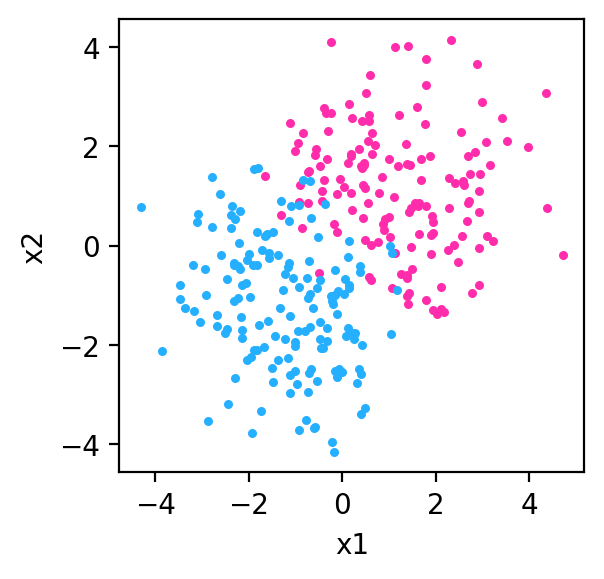

In [3]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
ax.scatter(*samples[labels == 1].T, s=5, color=labels_color[1])
ax.scatter(*samples[labels == 0].T, s=5, color=labels_color[0])
ax.set(xlabel="x1", ylabel="x2")

## K Nearest Neighbors

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
k = 3
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(samples, labels)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn_clf.predict(samples)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [13]:
(labels == knn_clf.predict(samples)).mean()

0.9666666666666667

## How accurate is this model?

In [6]:
predicted_labels = knn_clf.predict(samples)

In [7]:
(predicted_labels == labels).mean()

0.9666666666666667

### Visualize the boundary

In [8]:
grid = np.stack(np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)), axis=2)
grid_points = grid.reshape(-1, 2)

grid_points_labels = knn_clf.predict(grid_points).reshape(100, 100)

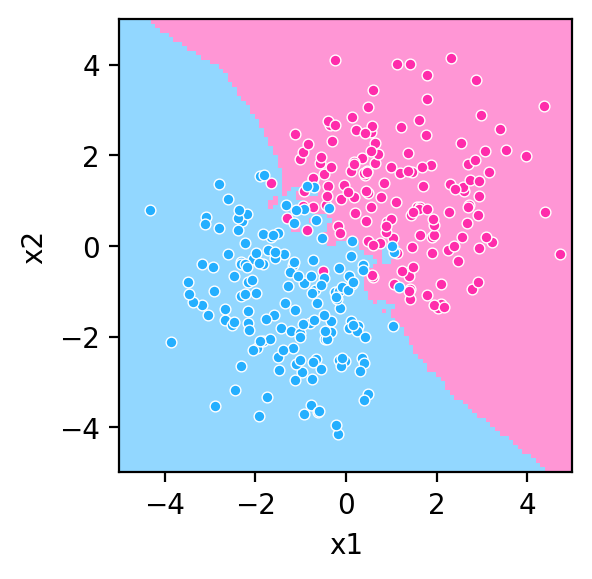

In [9]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(3, 3), dpi=200)

ax.scatter(*samples[labels == 1].T, s=15, ec='w', lw=.5, color=labels_color[1])
ax.scatter(*samples[labels == 0].T, s=15, ec='w', lw=.5, color=labels_color[0])

ax.imshow(grid_points_labels, 
          origin="lower", 
          extent=[-5, 5, -5, 5], 
          cmap=custom_cmap)

ax.set(xlabel="x1", ylabel="x2");

### Exercise #1: What is the smallest value of $k$ at which the small islands disappear?

### Exercise #2: Which $k$ results in the highest accuracy?

### Exercise #3: How well can you predict the labels of the `samples_test.npy`?

Send your predictions to the Rocket.Chat channel

---

## Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lg_clf = LogisticRegression()
lg_clf.fit(samples, labels)

LogisticRegression()

In [12]:
grid_points_labels = lg_clf.predict(grid_points).reshape(100, 100)

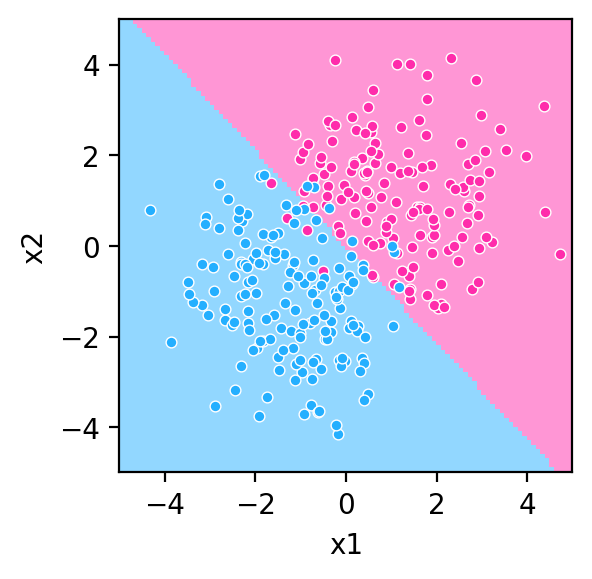

In [13]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(3, 3), dpi=200)

ax.scatter(*samples[labels == 1].T, s=15, ec='w', lw=.5, color=labels_color[1])
ax.scatter(*samples[labels == 0].T, s=15, ec='w', lw=.5, color=labels_color[0])

ax.imshow(grid_points_labels, 
          origin="lower", 
          extent=[-5, 5, -5, 5],
          cmap=custom_cmap)

ax.set(xlabel="x1", ylabel="x2");

## Behind the scenes of logistic regression

### Logistic regression is essentially a <span style="color:blue">linear model</span> with <span style="color:red">sigmoid function</span> on top:
<br>
\begin{align}
\huge h_w(x) &= \huge \color{red}{\sigma(}\color{blue}{xw}\color{red}{)}\\
\huge \sigma(z) &= \huge \frac{1}{1+e^{-z}}
\end{align}

#### How does the sigmoid function look like?

In [14]:
def sigmoid(z, temp=1):
    return 1/(1 + np.exp(-z/temp))

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$\\sigma(x)$')]

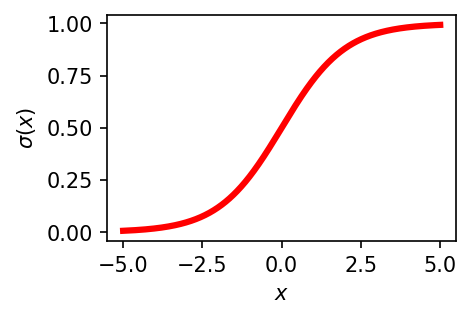

In [15]:
x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
ax.plot(x, sigmoid(x), lw=3, c='red')
ax.set(xlabel=r"$x$", ylabel=r"$\sigma(x)$")

In [16]:
w = np.load("w.npy")
z = grid_points @ w
grid_points_labels = sigmoid(z).reshape(100, 100)

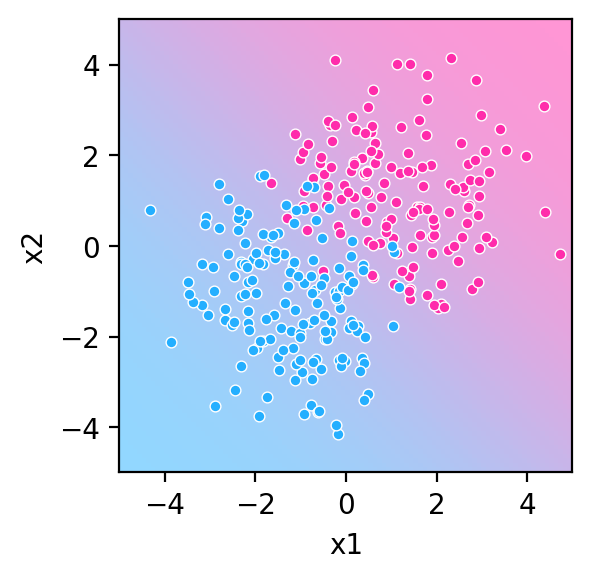

In [17]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(3, 3), dpi=200)

ax.scatter(*samples[labels == 1].T, s=15, ec='w', lw=.5, color=labels_color[1])
ax.scatter(*samples[labels == 0].T, s=15, ec='w', lw=.5, color=labels_color[0])

ax.imshow(grid_points_labels, 
          origin="lower", 
          extent=[-5, 5, -5, 5],
          cmap=custom_cmap)
ax.set(xlabel="x1", ylabel="x2");

The output of the sigmoid function is then thresholded to get the predicted labels.

In [18]:
grid_points_labels[grid_points_labels > 0.5] = 1
grid_points_labels[grid_points_labels <= 0.5] = 0

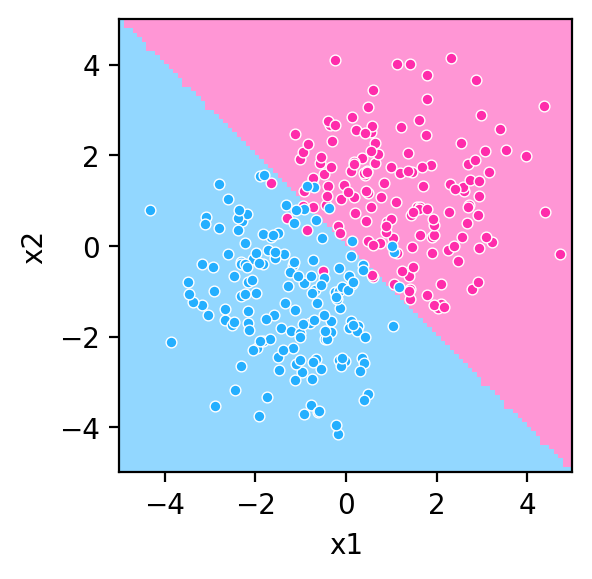

In [19]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(3, 3), dpi=200)

ax.scatter(*samples[labels == 1].T, s=15, ec='w', lw=.5, color=labels_color[1])
ax.scatter(*samples[labels == 0].T, s=15, ec='w', lw=.5, color=labels_color[0])

ax.imshow(grid_points_labels, 
          origin="lower", 
          extent=[-5, 5, -5, 5],
          cmap=custom_cmap)
ax.set(xlabel="x1", ylabel="x2");

### Exercise 5: 

#### 1. Load the samples from `ex5_samples.npy` and the labels from `ex5_labels.npy`

#### 2. Visualize the samples and color each label separately.

#### 3. Which one of the models (KNN and logistic regression) result in a higher classification accuracy?

**hint**: look into lecture 07, slide 85.

#### 4. How do the same models perform on the new samples from `ex5_samples_test.npy`? Compute prediction accuracy using the labels from `ex5_labels_test.npy`.

---

## Overfitting: what is it and how to avoid it?

#### In the last exercise, what is the accuracy on the train and test set as a function of $k$?

In [20]:
def cart2pol(samples):
    x, y = samples.T
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return np.stack((rho, phi)).T

In [21]:
samples = np.load("ex5_samples.npy")
labels = np.load("ex5_labels.npy")

samples_test = np.load("ex5_samples_test.npy")
labels_test = np.load("ex5_labels_test.npy")

transformed_samples = cart2pol(samples)
transformed_samples_test = cart2pol(samples_test)

In [22]:
accuracies_train, accuracies_test = [], []
ks = np.arange(1, 10)
for k in ks:
    
    # fit the model to the training set
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(transformed_samples, labels)
    
    # train set
    prediction_train = knn_clf.predict(transformed_samples)
    acc_train = (prediction_train == labels).mean()
    accuracies_train.append(acc_train)
    
    # test set
    prediction_test = knn_clf.predict(transformed_samples_test)
    acc_test = (prediction_test == labels_test).mean()
    accuracies_test.append(acc_test)

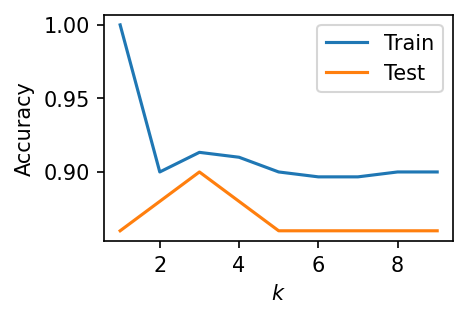

In [23]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)

ax.plot(ks, accuracies_train, label="Train")
ax.plot(ks, accuracies_test, label="Test")
ax.set(xlabel=r"$k$", ylabel="Accuracy")
ax.legend()

#### How to choose $k$ when we only have the training set? 

We don't usually get a chance to see the test labels and then figure out what is the best $k$. In this case we instead of using the whole dataset to train our model, we **split** it into **"training"** and **"validation"** datasets.

We measure how well the model trained on the **training** dataset generalizes to the **validation** dataset, and pick the model with best performance on the validation dataset.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
samples_train, samples_val, labels_train, labels_val = train_test_split(transformed_samples, labels, test_size=0.2, random_state=0)

In [26]:
samples.shape, samples_train.shape, samples_val.shape

((300, 2), (240, 2), (60, 2))

In [27]:
accuracies_train, accuracies_val = [], []
ks = np.arange(1, 10)

for k in ks:
    
    # fit the model to the training set
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(samples_train, labels_train)
    
    # train set
    prediction_train = knn_clf.predict(samples_train)
    acc_train = (prediction_train == labels_train).mean()
    accuracies_train.append(acc_train)
    
    # validation set
    prediction_val = knn_clf.predict(samples_val)
    acc_val = (prediction_val == labels_val).mean()
    accuracies_val.append(acc_val)

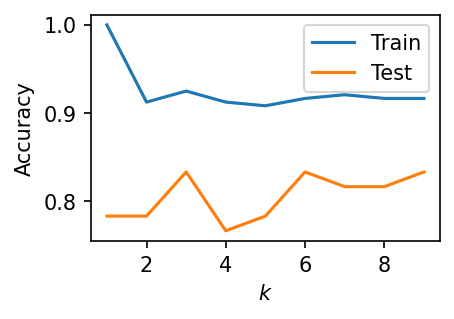

In [28]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)

ax.plot(ks, accuracies_train, label="Train")
ax.plot(ks, accuracies_val, label="Test")
ax.set(xlabel=r"$k$", ylabel="Accuracy")
ax.legend()

Here we treated one specific subset of the dataset as the validation set, but a better approach would be to consider multiple different subsets as the validation set and check the generalization across all of them -> this approach is called **cross-validation**.

## Cross-validation

<div style="text-align:center">
    <img src ="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" height="600" width="600"/>
</div>

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
ks = np.arange(1, 10)

accuracies = []
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, samples, labels, cv=5)
    accuracies.append(scores)
    
accuracies = np.array(accuracies)

In [31]:
accuracies

array([[0.85      , 0.83333333, 0.86666667, 0.8       , 0.76666667],
       [0.85      , 0.81666667, 0.86666667, 0.78333333, 0.8       ],
       [0.91666667, 0.81666667, 0.88333333, 0.8       , 0.83333333],
       [0.86666667, 0.81666667, 0.91666667, 0.78333333, 0.85      ],
       [0.9       , 0.81666667, 0.88333333, 0.83333333, 0.86666667],
       [0.88333333, 0.8       , 0.88333333, 0.85      , 0.83333333],
       [0.9       , 0.8       , 0.88333333, 0.86666667, 0.85      ],
       [0.88333333, 0.85      , 0.88333333, 0.85      , 0.83333333],
       [0.88333333, 0.8       , 0.88333333, 0.85      , 0.85      ]])

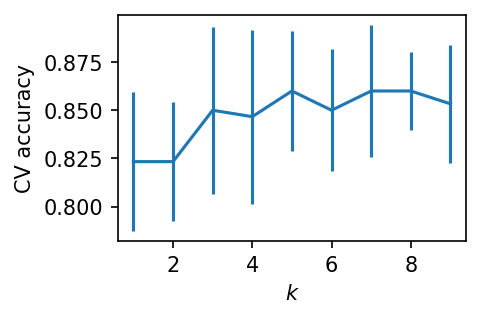

In [32]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)

ax.errorbar(ks, accuracies.mean(axis=1), yerr=accuracies.std(axis=1))
ax.set(xlabel=r"$k$", ylabel=r"CV accuracy");